In [ ]:
# these codes are wrote and tested in google colab, local ide may require a
# small twist in the code.

import math

def insertion_sort(arr):
    for i in range(1, len(arr)):
        temp = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > temp:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = temp

def find_median_of_medians(arr):
    if len(arr) <= 5:
        insertion_sort(arr)
        return arr[len(arr) // 2]

    sublists = [arr[i:i+5] for i in range(0, len(arr), 5)]
    medians = [find_median_of_medians(sublist) for sublist in sublists]

    return find_median_of_medians(medians)

def partition(arr, left, right, pivot):
    for i in range(left, right):
        if arr[i] == pivot:
            arr[i], arr[right] = arr[right], arr[i]
            break

    i = left
    for j in range(left, right):
        if arr[j] < pivot:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1

    arr[i], arr[right] = arr[right], arr[i]
    return i

def quick_select(arr, k):
    if len(arr) == 1:
        return arr[0]

    median_of_medians = find_median_of_medians(arr)
    pivot_index = partition(arr, 0, len(arr) - 1, median_of_medians)

    if k == pivot_index:
        return arr[k]
    elif k < pivot_index:
        return quick_select(arr[:pivot_index], k)
    else:
        return quick_select(arr[pivot_index + 1:], k - (pivot_index + 1))

arr = [3, 6, 1, 9, 8, 2, 7, 5, 4]
k = 3  # Find the 4th smallest element
result = quick_select(arr, k - 1)
print(f"The {k}th smallest element is: {result}")

The 3th smallest element is: 3


In [ ]:
import random
import timeit
def rand_arr(size):
    return [random.randint(1, 1000000) for _ in range(size)]


In [ ]:
num_exp = 100 # Run each experiment num_exp times for accuracy
exp_size = 10 # Array of size exp_size
arr = rand_arr(exp_size)
k = len(arr) // 2 # find median for test
avg_runtime = timeit.timeit(lambda: quick_select(arr, k), number = num_exp) / num_exp

print(f"Average runtime of array of size {exp_size} takes {avg_runtime}")

Average runtime of array of size 10 takes 2.538283000149022e-05


In [ ]:
num_exp = 100 # Run each experiment num_exp times for accuracy
exp_size = 100 # Array of size exp_size
arr = rand_arr(exp_size)
k = len(arr) // 2 # find median for test
avg_runtime = timeit.timeit(lambda: quick_select(arr, k), number = num_exp) / num_exp

print(f"Average runtime of array of size {exp_size} takes {avg_runtime}")

Average runtime of array of size 100 takes 0.0004531333599993559


In [ ]:
num_exp = 100 # Run each experiment num_exp times for accuracy
exp_size = 1000 # Array of size exp_size
arr = rand_arr(exp_size)
k = len(arr) // 2 # find median for test
avg_runtime = timeit.timeit(lambda: quick_select(arr, k), number = num_exp) / num_exp

print(f"Average runtime of array of size {exp_size} takes {avg_runtime}")

Average runtime of array of size 1000 takes 0.005018231460001061


In [ ]:
num_exp = 100 # Run each experiment num_exp times for accuracy
exp_size = 10000 # Array of size exp_size
arr = rand_arr(exp_size)
k = len(arr) // 2 # find median for test
avg_runtime = timeit.timeit(lambda: quick_select(arr, k), number = num_exp) / num_exp

print(f"Average runtime of array of size {exp_size} takes {avg_runtime}")

Average runtime of array of size 10000 takes 0.04279187151000088


In [ ]:
num_exp = 50 # Run each experiment num_exp times for accuracy
exp_size = 100000 # Array of size exp_size
arr = rand_arr(exp_size)
k = len(arr) // 2 # find median for test
avg_runtime = timeit.timeit(lambda: quick_select(arr, k), number = num_exp) / num_exp

print(f"Average runtime of array of size {exp_size} takes {avg_runtime}")

Average runtime of array of size 100000 takes 1.668962665580002


In [ ]:
# testing array of size 1,000,000 takes too long, reduce number of experments
# it will lower the accuracy, but increase speed
num_exp = 10 # Run each experiment num_exp times for accuracy
exp_size = 1000000 # Array of size exp_size
arr = rand_arr(exp_size)
k = len(arr) // 2 # find median for test
avg_runtime = timeit.timeit(lambda: quick_select(arr, k), number = num_exp) / num_exp

print(f"Average runtime of array of size {exp_size} takes {avg_runtime}")

Average runtime of array of size 1000000 takes 3.8487444818999847


In [ ]:
# testing array of size 10,000,000 takes too long, reduce number of experments
# it will lower the accuracy, but increase speed
num_exp = 5 # Run each experiment num_exp times for accuracy
exp_size = 10000000 # Array of size exp_size
arr = rand_arr(exp_size)
k = len(arr) // 2 # find median for test
avg_runtime = timeit.timeit(lambda: quick_select(arr, k), number = num_exp) / num_exp

print(f"Average runtime of array of size {exp_size} takes {avg_runtime}")

Average runtime of array of size 10000000 takes 40.503634243600025


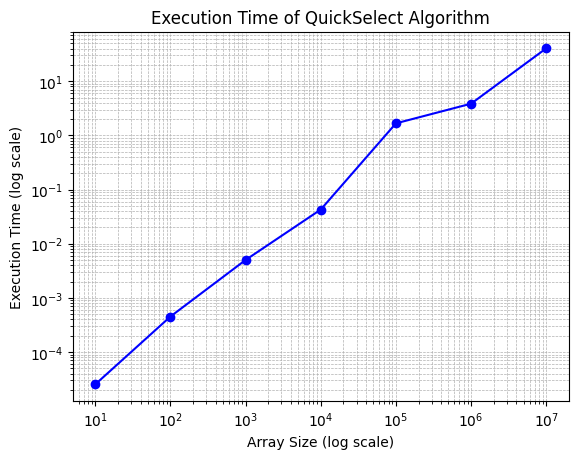

In [ ]:
import matplotlib.pyplot as plt

array_sizes = [10, 100, 1000, 10000, 100000, 1000000, 10000000]
execution_times = [2.538283000149022e-05, 0.0004531333599993559, 0.005018231460001061, 0.04279187151000088, 1.668962665580002, 3.8487444818999847, 40.503634243600025]

plt.plot(array_sizes, execution_times, marker='o', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Array Size (log scale)')
plt.ylabel('Execution Time (log scale)')
plt.title('Execution Time of QuickSelect Algorithm')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()